<a href="https://colab.research.google.com/github/amirmohammadkalateh/Convolutional-Neural-Network-CNN-/blob/main/CNN_ss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)


Model architecture plot saved as 'cnn_model.png'


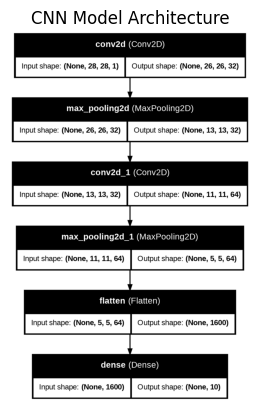

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    # Convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and input shape for a 28x28 grayscale image
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling layer with a 2x2 pool size
    model.add(layers.MaxPooling2D((2, 2)))
    # Convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # Max pooling layer with a 2x2 pool size
    model.add(layers.MaxPooling2D((2, 2)))
    # Flatten the output from the convolutional layers
    model.add(layers.Flatten())
    # Fully connected layer with 10 neurons (for 10 classes, e.g., MNIST digits) and softmax activation for probability distribution
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Create the CNN model
cnn_model = create_cnn_model()

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to visualize the architecture
cnn_model.summary()

# --- Optional: Visualize the model architecture using a plot ---
try:
    tf.keras.utils.plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
    print("\nModel architecture plot saved as 'cnn_model.png'")
    plt.imshow(plt.imread('cnn_model.png'))
    plt.title("CNN Model Architecture")
    plt.axis('off')
    plt.show()
except ImportError:
    print("\nWarning: pydot or graphviz not found. Cannot generate model architecture plot. Please install them if you want to visualize the model.")
except Exception as e:
    print(f"\nAn error occurred while generating the model plot: {e}")